In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score , mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

In [243]:
# Create lagged DataFrame
def create_lagged_df(df, lags):
    df_lagged = pd.DataFrame()
    for i in range(lags+1):
        if i == 0:
            df_lagged['t'] = df['PJME_MW']
        else:
            df_lagged['t-'+str(i)] = df['PJME_MW'].shift(i)
    return df_lagged.dropna()

dfs = []
for filename in os.listdir("19 Houses"):
    dfTemp = pd.read_csv("19 Houses/"+ filename)
    # choose 2 or 3 lagged variables as per Autocorrelation Function test
    dfTemp = create_lagged_df(dfTemp, 3)
    dfs.append(dfTemp)
df = pd.concat(dfs, ignore_index=True)
df.describe()

,t,t-1,t-2,t-3
count,485564.000000,485564.000000,485564.000000,485564.000000
mean,0.884873,0.884878,0.884877,0.884887
std,0.925526,0.925530,0.925522,0.925527
min,0.000000,0.000000,0.000000,0.000000
25%,0.280000,0.280000,0.280000,0.280000
50%,0.550000,0.550000,0.550000,0.550000
75%,1.180000,1.180000,1.180000,1.180000
max,24.330000,24.330000,24.330000,24.330000


In [244]:
train, test = train_test_split(df, test_size=0.2)
trainX = np.c_[train['t-1'], train['t-2'], train['t-3']]
testX = np.c_[test['t-1'], test['t-2'], test['t-3']]
trainY = train['t'].to_numpy()
testY = test['t'].to_numpy()
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.layers import Input
model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(10, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(1, activation="relu"))
model.compile(optimizer="adam", loss="mse")
model.fit(trainX, trainY, epochs=50, batch_size=32, verbose=2)
results = model.predict(testX)
print(mean_absolute_error(testY, results))
trainResults = model.predict(trainX)
print(mean_absolute_error(trainResults, trainY))


Epoch 1/50
12140/12140 - 43s - 4ms/step - loss: 0.3717
Epoch 2/50
12140/12140 - 50s - 4ms/step - loss: 0.3654
Epoch 3/50
12140/12140 - 49s - 4ms/step - loss: 0.3645
Epoch 4/50
12140/12140 - 47s - 4ms/step - loss: 0.3636
Epoch 5/50
12140/12140 - 39s - 3ms/step - loss: 0.3631
Epoch 6/50
12140/12140 - 32s - 3ms/step - loss: 0.3629
Epoch 7/50
12140/12140 - 29s - 2ms/step - loss: 0.3628
Epoch 8/50
12140/12140 - 27s - 2ms/step - loss: 0.3627
Epoch 9/50
12140/12140 - 29s - 2ms/step - loss: 0.3624
Epoch 10/50
12140/12140 - 29s - 2ms/step - loss: 0.3622
Epoch 11/50
12140/12140 - 31s - 3ms/step - loss: 0.3623
Epoch 12/50
12140/12140 - 35s - 3ms/step - loss: 0.3623
Epoch 13/50
12140/12140 - 31s - 3ms/step - loss: 0.3621
Epoch 14/50
12140/12140 - 28s - 2ms/step - loss: 0.3621
Epoch 15/50
12140/12140 - 28s - 2ms/step - loss: 0.3619
Epoch 16/50
12140/12140 - 26s - 2ms/step - loss: 0.3617
Epoch 17/50
12140/12140 - 30s - 2ms/step - loss: 0.3616
Epoch 18/50
12140/12140 - 31s - 3ms/step - loss: 0.3616
E

In [245]:
trainX = train["t-1"].to_numpy()
testX = test["t-1"].to_numpy()

def create_samples(sequence, window_size):
    X, y = [], []
    for i in range(len(sequence) - window_size):
        X.append(sequence[i:i + window_size])
        y.append(sequence[i + window_size])
    return np.array(X), np.array(y)

Xtrain, Ytrain = create_samples(trainX, 4)
Xtest, Ytest = create_samples(testY, 4)

model = Sequential()
model.add(Conv1D(3, kernel_size=3, input_shape=(4, 1), padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.05))
model.add(Dense(3))
model.add(Dense(1, activation='relu'))
model.compile(optimizer="adam", loss="mse")
model.fit(Xtrain, Ytrain, epochs=10, batch_size=32, verbose=2)
results = model.predict(Xtest)
print(mean_absolute_error(Ytest, results))
trainResults = model.predict(Xtrain)
print(mean_absolute_error(trainResults, Ytrain))

c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
12139/12139 - 64s - 5ms/step - loss: 0.9586
Epoch 2/10
12139/12139 - 67s - 6ms/step - loss: 0.8540
Epoch 3/10
12139/12139 - 70s - 6ms/step - loss: 0.8540
Epoch 4/10
12139/12139 - 71s - 6ms/step - loss: 0.8541
Epoch 5/10
12139/12139 - 71s - 6ms/step - loss: 0.8540
Epoch 6/10
12139/12139 - 71s - 6ms/step - loss: 0.8540
Epoch 7/10
12139/12139 - 68s - 6ms/step - loss: 0.8540
Epoch 8/10
12139/12139 - 71s - 6ms/step - loss: 0.8540
Epoch 9/10
12139/12139 - 71s - 6ms/step - loss: 0.8540
Epoch 10/10
12139/12139 - 71s - 6ms/step - loss: 0.8540
3035/3035 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
0.6591574536799423
12139/12139 ━━━━━━━━━━━━━━━━━━━━ 51s 4ms/step
0.6594415454349231


In [246]:
from random import randrange
from keras.layers import LSTM

errors = []

for path in os.listdir("19 Houses"):
    df = create_lagged_df(pd.read_csv("19 Houses/" + path), 1)
    test = df[:(df.shape[0]//5)]
    train = df[(df.shape[0]//5):]
    model = Sequential()
    model.add(LSTM(50, input_shape=(4, 1)))
    model.add(Dense(10))
    model.add(Dense(1, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam')

    trainX = train["t-1"].to_numpy()
    trainX = np.reshape(trainX, (trainX.shape[0], 1))
    testX = test["t-1"].to_numpy()
    testX = np.reshape(testX, (testX.shape[0], 1))
    trainY = train["t"].to_numpy()
    testY = test["t"].to_numpy()

    model.fit(trainX, trainY, epochs=50, batch_size=32, verbose=0)
    predictions = model.predict(testX)
    errors.append(mean_absolute_error(testY, predictions))
pd.DataFrame(errors).describe()

c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


,0
count,19.000000
mean,0.565400
std,0.443683
min,0.185748
25%,0.275745
50%,0.413006
75%,0.699160
max,2.109356


In [247]:
from keras.layers import SimpleRNN
errors = []
for path in os.listdir("19 Houses"):
    df = create_lagged_df(pd.read_csv("19 Houses/" + path), 1)
    test = df[:(df.shape[0]//5)]
    train = df[(df.shape[0]//5):]
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(4,1)))
    model.add(Dense(10))
    model.add(Dense(1, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    trainX = train["t-1"].to_numpy()
    trainX = np.reshape(trainX, (trainX.shape[0], 1))
    testX = test["t-1"].to_numpy()
    testX = np.reshape(testX, (testX.shape[0], 1))
    trainY = train["t"].to_numpy()
    testY = test["t"].to_numpy()
    model.fit(trainX, trainY, epochs=50, batch_size=32, verbose=0)
    predictions = model.predict(testX)
    errors.append(mean_absolute_error(testY, predictions))
pd.DataFrame(errors).describe()

c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,0
count,19.000000
mean,0.577181
std,0.487411
min,0.078910
25%,0.264887
50%,0.485637
75%,0.634561
max,1.979810


In [6]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import os

errors = []
ESerrors = []
for filename in os.listdir("19 Houses"):
    series = pd.read_csv("19 Houses/"+ filename)['PJME_MW']
    testARIMA = series[len(series)-11:]
    series = series[:len(series)-11]
    result = adfuller(series)

    model = ARIMA(series, order=(2, 0, 4))
    model_fit = model.fit()

    predictions = model_fit.predict(start=len(series), end=len(series)+10)
    error = mean_absolute_error(testARIMA, predictions)
    errors.append(error)
    model = SimpleExpSmoothing(series)
    model_fit = model.fit(smoothing_level=0.2)
    yhat = model_fit.predict(start=len(series), end=len(series)+10)
    error = mean_absolute_error(testARIMA, yhat)
    ESerrors.append(error)
    if filename == "house19.csv":
        break
    break

pd.DataFrame(errors).describe()
print(result)

c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(-13.306988055182787, 6.866181709176566e-25, 48, 25499, {'1%': -3.4306064790157453, '5%': -2.861653356057387, '10%': -2.5668303360979325}, 5969.85354879935)


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [249]:
pd.DataFrame(ESerrors).describe()

,0
count,11.000000
mean,0.452383
std,0.363514
min,0.036353
25%,0.095997
50%,0.414889
75%,0.787862
max,0.902856


In [257]:
randoms = []
while len(randoms) < 3:
    tempNum = randrange(len(os.listdir("19 Houses")))
    if tempNum not in randoms:
        randoms.append(tempNum)
print(randoms)

[18, 7, 0]


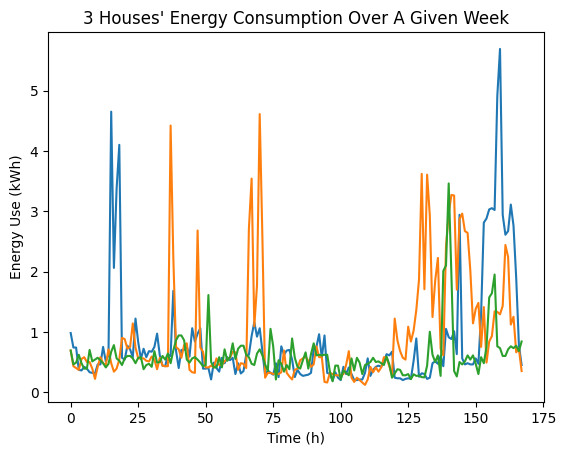

In [258]:
filePaths = [os.listdir("19 Houses")[randoms[0]], os.listdir("19 Houses")[randoms[1]], os.listdir("19 Houses")[randoms[2]]]
for path in filePaths:
    dfTemp = pd.read_csv("19 Houses/"+ path)
    consumption = dfTemp["PJME_MW"].head((24*7)).to_numpy()
    plt.plot(consumption)
    plt.title("3 Houses' Energy Consumption Over A Given Week")
    plt.xlabel("Time (h)")
    plt.ylabel("Energy Use (kWh)")
plt.show()

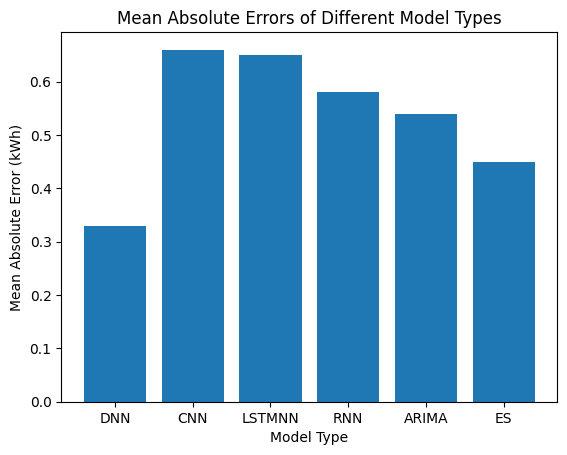

In [262]:
models = ["DNN", "CNN", "LSTMNN", "RNN", "ARIMA", "ES"]
errorValues = [0.33, 0.66, 0.65, 0.58, 0.54, 0.45]
plt.xlabel("Model Type")
plt.ylabel("Mean Absolute Error (kWh)")
plt.title("Mean Absolute Errors of Different Model Types")
plt.bar(models, errorValues)
plt.show()